In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import default_collate
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from torchmetrics import SpearmanCorrCoef

In [58]:
def get_image_data(method: str, net_out: str, task: str, scanner: int):
    directory = f'../../results-tmp/results/eval/{net_out}/image/'
    image_data = []
    for file in os.listdir(directory):
        if method in file and task in file and scanner in file[:-2]:
            f = torch.load(directory + file)
            if 'corr' in f.keys():
                f['corr'].target = [t.cpu() for t in f['corr'].target]
                f['corr'].preds = [t.cpu() for t in f['corr'].preds]
                f['corr'] = f['corr'].compute()
            image_data.append(f)
    #print(image_data)
    return default_collate(image_data)

In [60]:
df_ood_mms = pd.DataFrame(columns=['method', 'Domain', 'run', 'Accuracy'])
for method in ['gonzales', 'latents', 'entropy', 'ensemble_tmp', 'ae']:
    for scanner in ['val', 'A', 'B', 'C','D']:
        
        if 'ensemble' in method:
            task = 'ood'
        else:
            task = 'both'
        tmp = get_image_data(method=method, 
                             net_out='mms', 
                             task=task, 
                             scanner=str(scanner))

        if scanner == 'A':
            domain = 'Siemens \n'
        if scanner == 'B':
            domain = 'Philips'
        if scanner == 'C':
            domain = 'GE'
        if scanner == 'D':
            domain = 'Canon'
        if scanner == 'val':
            continue
            
        if method == 'gonzales':
            m = 'Pooling Mahalanobis'
        if method == 'entropy':
            m = 'Entropy - Single Net'
        if method == 'latents':
            m = 'Latent Mahalanobis'
        if method == 'ae':
            m = 'Sample Distortion'
        if method == 'ensemble_tmp':
            m = 'Entropy - Ensemble'
            
        for i, ood in enumerate(tmp['ood']):
            row = {'Domain': domain, 
                   'method': m, 
                   'run': i, 
                   'Accuracy': ood.numpy().item()}

            df_ood_mms = df_ood_mms.append(row, ignore_index=True)

[{'ood': 0.9661458134651184, 'corr': tensor(-0.0269)}, {'ood': 0.9192708134651184, 'corr': tensor(0.0276)}, {'ood': 0.9453125, 'corr': tensor(0.0017)}, {'ood': 0.9505208134651184, 'corr': tensor(0.0388)}, {'ood': 0.9739583134651184, 'corr': tensor(-0.0297)}, {'ood': 0.9817708134651184, 'corr': tensor(-0.0117)}, {'ood': 0.9635416865348816, 'corr': tensor(0.0169)}, {'ood': 0.9739583134651184, 'corr': tensor(-0.0208)}, {'ood': 0.953125, 'corr': tensor(-0.0137)}, {'ood': 0.9140625, 'corr': tensor(-0.0240)}]
[{'ood': 1.0, 'corr': tensor(-0.0127)}, {'ood': 1.0, 'corr': tensor(0.0136)}, {'ood': 1.0, 'corr': tensor(0.0268)}, {'ood': 1.0, 'corr': tensor(-0.0092)}, {'ood': 1.0, 'corr': tensor(-0.0112)}, {'ood': 1.0, 'corr': tensor(-0.0101)}, {'ood': 1.0, 'corr': tensor(0.0137)}, {'ood': 1.0, 'corr': tensor(-0.0185)}, {'ood': 1.0, 'corr': tensor(-0.0315)}, {'ood': 1.0, 'corr': tensor(0.0516)}]
[{'ood': 1.0, 'corr': tensor(-0.0973)}, {'ood': 1.0, 'corr': tensor(-0.1046)}, {'ood': 1.0, 'corr': tens

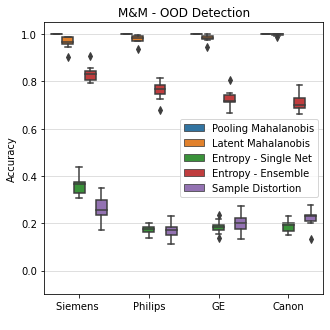

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(5,5),  gridspec_kw={'hspace': 0})
axes.set_title('M&M - OOD Detection')

sns.boxplot(ax=axes, x="Domain", y="Accuracy",
        hue="method", data=df_ood_mms)
axes.legend().set_title('')
axes.set_xlabel("")
axes.set_ylim(-0.1, 1.05)
axes.yaxis.grid(True, alpha=0.5, zorder=0)
fig.savefig("../../results-tmp/results/eval/mms_ood.jpg", bbox_inches='tight', dpi=400)